# Minería de Datos

## Grado en Ingeniería Informática
## Universidad de Burgos
## José Francisco  Diez
## Curso 2016-2017

# Tratamiento de datos estructurados o con forma de tabla: Pandas

Pandas va a ser usado para trabajar con datos estructurados o con forma de tabla.
Podríamos verlo como el equivalente Python de la hoja de calculo.

Va a permitir:
- Importar/exportar datos en multitud de formatos.
- Limpiar datos confusos, ruidosos, enmarañados etc
- Explotar los datos con visualizaciones simples.
- Preparar los datos para análisis posteriores con Scikit-learn u otras herramientas.

Pandas es una herramienta construida sobre NumPy que:
- Aporta etiquetas para las filas y para las columnas.
- Permite trabajar con datos heterogéneos (en NumPy) todos los datos del array son del mismo tipo.
- Añade funciones para trabajar con series temporales, missing, pivotar tablas, combinar tablas etc
- Permite hacer gráficos sencillos.




# Poner un indice que refleje lo que hay en la presentación


In [88]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #matplotlib.pyplot como plot


# Estructuras básicas de Pandas

Hay dos tipos principales de datos que estan construidos spbre los arrays de NumPy:
1. Series
2. DataFrames


## Series

Se utilizan para almacenar datos de **Una sola dimensión** y darles una etiqueta.

```Python
s = pd.Series([1, 2, 3, 4])
```

Las series tienen un índice y tienen valores. El índice por defecto son enteros (aunque pueden ser cualquier otra cosa) y los valores son un array de NumPy

In [89]:
s1 = pd.Series([1, 2, 3, 4, 5 ,6, 7, 8])
print("Indices ",s1.index,list(s1.index))
print("values", s1.values)



Indices  RangeIndex(start=0, stop=8, step=1) [0, 1, 2, 3, 4, 5, 6, 7]
values [1 2 3 4 5 6 7 8]


In [90]:
s1.index=['a','b','c','d','e','f','g','h']
'''
o tambien podría haberlo creado directamente con el índice
s1 = pd.Series([1, 2, 3, 4], index=['a','b','c','d'])
'''
s1['c']

3

In [4]:
# si hubiese duplicados con unique() obtenemos solo los únicos
s1.unique() 

array([1, 2, 3, 4, 5, 6, 7, 8])

En un principio podriamos pensar que las Series no son más que un diccionario. Pero las Series nos permiten hacer todo lo que haciamos con los array de NumPy:
- Operaciones a todos los elementos
- Sliding
- Máscaras booleanas
- Fancy Indexing
- Agregaciones

In [5]:
s1*10 #aplicar una operación a todos los elementos a la vez

a    10
b    20
c    30
d    40
e    50
f    60
g    70
h    80
dtype: int64

In [6]:
#slides
s1['c':'f']

c    3
d    4
e    5
f    6
dtype: int64

In [7]:
# Fancy indexing
s1[['a','c','d']]

a    1
c    3
d    4
dtype: int64

In [110]:
# Máscaras booleanas
s1[s1<5]

a    1
b    2
c    3
d    4
dtype: int64

In [9]:
population = pd.Series({'Alemania': 81.3, 
                        'Belgica': 11.3, 
                        'Francia': 64.3, 
                        'Reino Unido': 64.9, 
                        'Holanda': 16.9,
                        'España': 47
                       })
                        
population[population>20]

Alemania       81.3
España         47.0
Francia        64.3
Reino Unido    64.9
dtype: float64

In [10]:
# Similar a las máscaras booleanas pero con valores concretos está isin

population.isin([81.3, 64.3])

Alemania        True
Belgica        False
España         False
Francia         True
Holanda        False
Reino Unido    False
dtype: bool

In [11]:
# agregaciones
population.min()

11.300000000000001

La única diferencia a la que tenemos que prestar atención es que las series usan índices y eso afecta a la hora de operar con 2 o más series.

```Python
a1 = np.array([10,20,30])
a2 = np.array([1,2])
a1 + a2
```
Daría error porque tienen el mismo tamaño

In [12]:
paises1 = pd.Series({'Alemania': 81.3, 
                     'Belgica': 11.3, 
                     'Francia': 64.3, 
                       })
paises2 = pd.Series({'Alemania': 81.3, 
                     'Holanda': 16.9,
                     'España': 47
                       })
# No da error, pero solo podemos operar con varias series 
# si comparte índices
paises1 + paises2

Alemania    162.6
Belgica       NaN
España        NaN
Francia       NaN
Holanda       NaN
dtype: float64

In [13]:
# Podemos substituir NaN por 0 cuando sea necesario
(paises1 + paises2).fillna(0)

Alemania    162.6
Belgica       0.0
España        0.0
Francia       0.0
Holanda       0.0
dtype: float64

## DataFrames

Si las series son para datos de una sola dimensión, los dataframes son para datos con varias dimensiones. Se puede ver como varias series que comparten índice.

Como una hoja de cálculo los podemos indexar por la fila o por la columna.

Se puede crear un DataFrame como un diccionario de Columna:Serie

In [14]:

data = {'Pais': ['Belgica', 'Francia', 'Alemania', 'Holanda', 'Reino Unido'],
        'Poblacion': [11.3, 64.3, 81.3, 16.9, 64.9],
        'Area': [30510, 671308, 357050, 41526, 244820],
        'Capital': ['Bruselas', 'Paris', 'Berlin', 'Amsterdam', 'Londres']}
paises = pd.DataFrame(data)
paises

,Area,Capital,Pais,Poblacion
0,30510,Bruselas,Belgica,11.3
1,671308,Paris,Francia,64.3
2,357050,Berlin,Alemania,81.3
3,41526,Amsterdam,Holanda,16.9
4,244820,Londres,Reino Unido,64.9


Pero lo más habitual es cargar los datos desde un fichero o desde NumPy

In [15]:
bodyFat = pd.read_csv('BodyFat.csv')
bodyFat.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Fat_Percent
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.27
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.10
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.32
3,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8,21.34
4,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7,19.24


In [16]:
# Otra forma de crear dataFrames es pasando los valores como un array y los indices

values = np.array([[10,20,30],[1,2,3]])
index = [1,2]

df = pd.DataFrame(values, index=index)
df

,0,1,2
1,10,20,30
2,1,2,3


In [17]:
df.columns = ["Uno","Dos","Tres"]
df

,Uno,Dos,Tres
1,10,20,30
2,1,2,3


Un DataFrame tiene principalmente 3 atributos:
1. values: Devuelve un np.array de elementos de tipo object
2. index: Devuelve un objeto de tipo index para las filas
3. columns: Devuelve un objeto de tipo index para las columnas


In [18]:
paises.columns

Index(['Area', 'Capital', 'Pais', 'Poblacion'], dtype='object')

Se puede cambiar el nombre de una columna pasandole otra lista de nombres a columns o usando rename 


In [19]:
df.rename(columns={"Uno": "1"})

,1,Dos,Tres
1,10,20,30
2,1,2,3


Se puede acceder a cada una de las Series (o columnas) directamente por el nombre, como en un diccionario. Nos devolverá el índice y la columna que hemos indicado.
Se puede cambiar el índice con **set_index**

In [111]:
print(paises["Poblacion"])
print(paises.set_index("Pais")["Poblacion"])

paises.set_index("Pais")

0    11.3
1    64.3
2    81.3
3    16.9
4    64.9
Name: Poblacion, dtype: float64
Pais
Belgica        11.3
Francia        64.3
Alemania       81.3
Holanda        16.9
Reino Unido    64.9
Name: Poblacion, dtype: float64


,Area,Capital,Poblacion,Densidad
Pais,,,,
Belgica,30510,Bruselas,11.3,370.370370
Francia,671308,Paris,64.3,95.783158
Alemania,357050,Berlin,81.3,227.699202
Holanda,41526,Amsterdam,16.9,406.973944
Reino Unido,244820,Londres,64.9,265.092721


Añadir columnas a un DataFrame es muy fácil

In [21]:
paises['Densidad'] = paises['Poblacion']*1000000/paises['Area']
paises

,Area,Capital,Pais,Poblacion,Densidad
0,30510,Bruselas,Belgica,11.3,370.370370
1,671308,Paris,Francia,64.3,95.783158
2,357050,Berlin,Alemania,81.3,227.699202
3,41526,Amsterdam,Holanda,16.9,406.973944
4,244820,Londres,Reino Unido,64.9,265.092721


En los DataFrames funcionan las operaciones de los arrays de NumPy: fancy indexing, slides, agregaciones etc

Ej máscara booleana. Más adelante más.

In [22]:
paises[paises['Densidad'] > 300]

,Area,Capital,Pais,Poblacion,Densidad
0,30510,Bruselas,Belgica,11.3,370.370370
3,41526,Amsterdam,Holanda,16.9,406.973944


Se pueden ordenar los valores de acuerdo a una columna con **sort_values(by=...)** 

In [23]:
paises.sort_values(by='Densidad', ascending=False)

,Area,Capital,Pais,Poblacion,Densidad
3,41526,Amsterdam,Holanda,16.9,406.973944
0,30510,Bruselas,Belgica,11.3,370.370370
4,244820,Londres,Reino Unido,64.9,265.092721
2,357050,Berlin,Alemania,81.3,227.699202
1,671308,Paris,Francia,64.3,95.783158


## Resumenes de datos

Los DataFrames de Pandas proporcionan algunos métodos para realizar una exploración básica de los datos. Entre otras cosas se puede:

- Obtener una visión general de los datos.
- Obtener estadísticas básicas de los datos.


### Visión general de los datos.

El método **head()** que ya hemos visto permite obtener las N primeras filas (por defecto 10). De manera equivalente **tail()** permite obtener las N últimas.

El atributo dtype y el método **info()** devuelven información sobre los tipos y número de valores.







In [24]:
paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
Area         5 non-null int64
Capital      5 non-null object
Pais         5 non-null object
Poblacion    5 non-null float64
Densidad     5 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 280.0+ bytes


### Estadísticas básicas de los datos

El método **describe()** obtiene una serie de estadísticas como: máximo, mínimo, media y los percentiles (que se pueden configurar) 

In [25]:
paises.describe()

,Area,Poblacion,Densidad
count,5.000000,5.000000,5.000000
mean,269042.800000,47.740000,273.183879
std,264012.827994,31.519645,123.440607
min,30510.000000,11.300000,95.783158
25%,41526.000000,16.900000,227.699202
50%,244820.000000,64.300000,265.092721
75%,357050.000000,64.900000,370.370370
max,671308.000000,81.300000,406.973944


Entre las estadísticas básicas que se pueden calcular estan la suma, la media, la mediana, máximo, mínimo, varianza y std


In [26]:
# ejemplo std
print(paises.std())

Area         264012.827994
Poblacion        31.519645
Densidad        123.440607
dtype: float64


Se puede calcular la correlación entre dos columnas (que serían atributos en un dataset) usando el método **corr()**. 
La correlación nos indica la fuerza y la dirección de la relación lineal entre dos variables:
   - Valores positivos indican que las variables están positivamente relacionadas. Cuando una aumenta la otra aumenta y viceversa.
   - Valores negativos indican que las variables están negativamente relacionadas. 
   - La fuerza de la relación es el valor absoluto, que como máximo puede ser 1. Con 1 una variable A es una función lineal de B.  
   A = xB + y. 

In [95]:
bodyFat.corr()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Fat_Percent
Age,1.000000,-0.029717,-0.189239,0.105474,0.178382,0.232673,-0.068587,-0.226177,0.018374,-0.194233,-0.036814,-0.077736,0.205621,0.264410
Weight,-0.029717,1.000000,0.300696,0.803530,0.884299,0.872439,0.923537,0.841199,0.849564,0.631541,0.780979,0.661041,0.706367,0.609848
Height,-0.189239,0.300696,1.000000,0.247508,0.111232,0.063369,0.146470,0.116873,0.264019,0.309244,0.184627,0.208963,0.311126,-0.120663
Neck,0.105474,0.803530,0.247508,1.000000,0.757486,0.723397,0.685382,0.651281,0.652968,0.473335,0.704463,0.644027,0.719663,0.475287
Chest,0.178382,0.884299,0.111232,0.757486,1.000000,0.909872,0.806327,0.688903,0.699504,0.464813,0.707303,0.575003,0.617333,0.699589
Abdomen,0.232673,0.872439,0.063369,0.723397,0.909872,1.000000,0.854182,0.724913,0.710441,0.420245,0.659204,0.516997,0.579856,0.816760
Hip,-0.068587,0.923537,0.146470,0.685382,0.806327,0.854182,1.000000,0.875852,0.822034,0.562426,0.711389,0.570882,0.587137,0.630224
Thigh,-0.226177,0.841199,0.116873,0.651281,0.688903,0.724913,0.875852,1.000000,0.777247,0.558043,0.727606,0.575812,0.519026,0.537207
Knee,0.018374,0.849564,0.264019,0.652968,0.699504,0.710441,0.822034,0.777247,1.000000,0.651271,0.646972,0.565798,0.670195,0.473009
Ankle,-0.194233,0.631541,0.309244,0.473335,0.464813,0.420245,0.562426,0.558043,0.651271,1.000000,0.473232,0.459146,0.579798,0.200414


Los rankings **rank()** son una manera de asignar a cada fila del dataframe un valor de acuerdo a la posición que ocupa con respecto a las demás filas, tomando como referencia cada una de las columnas.

Se pueden combinar los ranking en un ranking promedio para dar una valoración general a cada una de las filas 

In [97]:
data = {'Nombre': ['Pau Gasol', 'Lebron James', 'Michael Jordan', 'Kobe Bryant'],
        'Puntos': [24, 38, 36, 37],
        'Rebotes': [20,22,16,16],
        'Asistencias': [20,8,20,10],
        'Robos': [1,2,4,2],
        }
jugadores = pd.DataFrame(data)
jugadores = jugadores.set_index("Nombre")
jugadores

,Asistencias,Puntos,Rebotes,Robos
Nombre,,,,
Pau Gasol,20,24,20,1
Lebron James,8,38,22,2
Michael Jordan,20,36,16,4
Kobe Bryant,10,37,16,2


In [99]:
jugadores['Asistencias']

Nombre
Pau Gasol         20
Lebron James       8
Michael Jordan    20
Kobe Bryant       10
Name: Asistencias, dtype: int64

In [29]:
ranking = jugadores.rank(ascending=False)
ranking

,Asistencias,Puntos,Rebotes,Robos
Nombre,,,,
Pau Gasol,1.5,4.0,2.0,4.0
Lebron James,4.0,1.0,1.0,2.5
Michael Jordan,1.5,3.0,3.5,1.0
Kobe Bryant,3.0,2.0,3.5,2.5


In [30]:
'''
Obviamente todas las columnas deberían tener la misma
representación mayor -> mejor.
Por ejemplo el número de expulsiones el algo que es mejor
cuanto más bajo, así que ese ranking deberiamos invertirlo.
'''
ranking.mean(axis=1) #Lebron James es el mejor si tenemos en cuenta todas las estadísticas

Nombre
Pau Gasol         2.875
Lebron James      2.125
Michael Jordan    2.250
Kobe Bryant       2.750
dtype: float64

## Realizar visualizaciones.

El método **plot()** se usa para hacer visualizaciones rápidas de los datos.
Por defecto el eje X va a ser el índice que tenga el DataFrame.

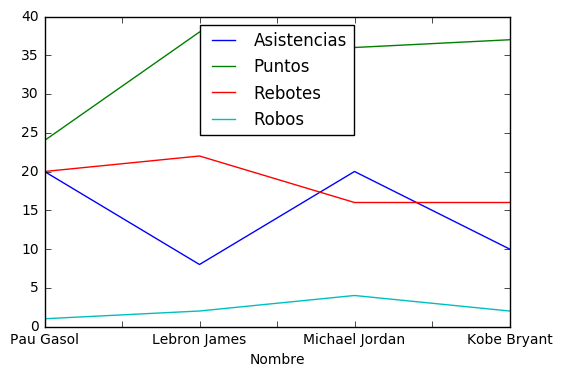

In [31]:
jugadores.plot()

Hay multitud de opciones cada una con varios parámetros que configuran la apariencia y el estilo. Nosotros vamos a ver los siguientes:
- Bar Plot
- Histogram Plot
- Box Plot
- Scatter Plot
- Pie Plot



#### Bar Plot

Muestra los datos en un gráfico de barras.
Por defecto muestra todas las columnas, pero podemos hacer *Fancy Indexing* para seleccionar solo las que queramos.
Se pueden agrupar todas las columnas en una sola con **stacked=True**

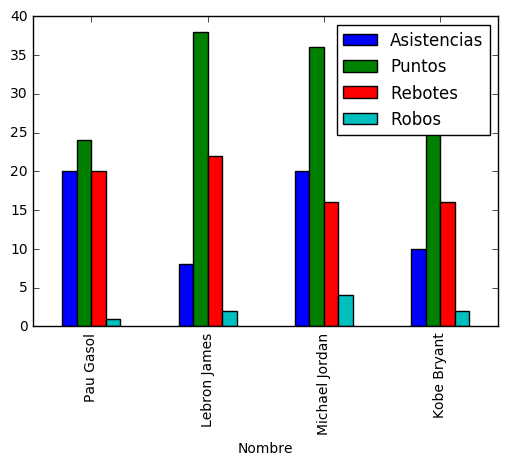

In [32]:
jugadores.plot(kind='bar');

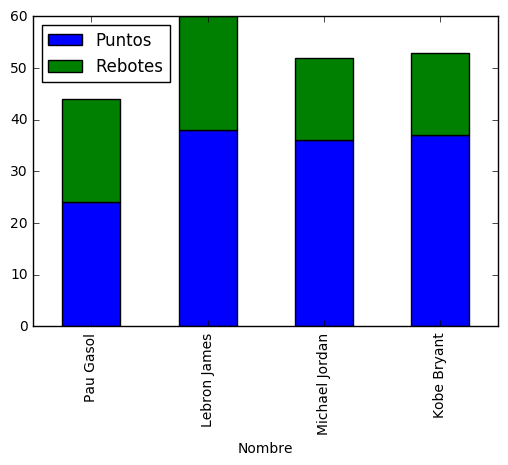

In [33]:
jugadores[['Puntos','Rebotes']].plot(kind='bar', stacked=True);

#### Histogram Plot

Muestra los datos en forma de histograma. Como todos los tipos de gráficos puede mostrar más de una columna con *Fancy Indexing*. Entre otras cosas permite especificar el número de bins y la transparencia.

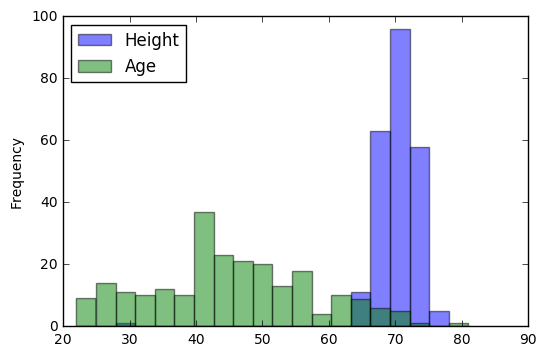

In [34]:
bodyFat[['Height','Age']].plot(kind='hist',bins=20, alpha=0.5);

#### Box Plot

Sirven para visualizar la distribución de los valores de cada columna, de manera gráfica se puede ver la dispersión y la simetría.
Se muestra: máximo, mínimo, mediana y el cuartil 25% y 75%

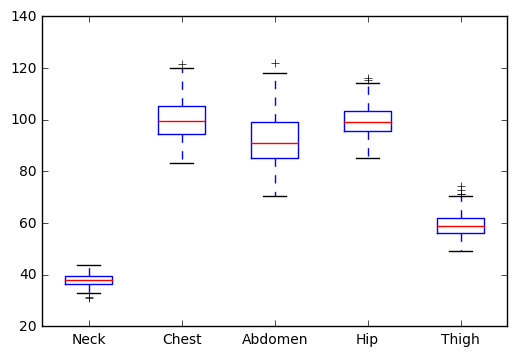

In [35]:
bodyFat[['Neck','Chest','Abdomen','Hip','Thigh']].plot(kind='box')

#### Pie Plot

Usado para representar proporciones.
Representa Series, si queremos representar un DataFrame, hay que poner *subplots=True* y esto pone cada uno de ellos en un subplot.



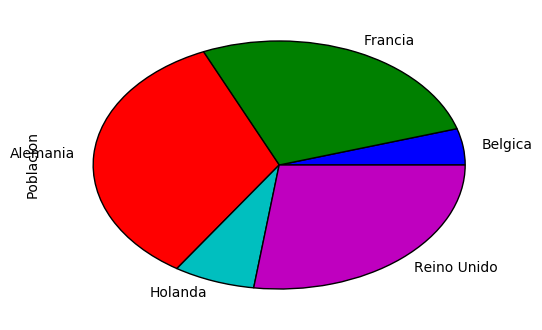

In [36]:
paises.set_index('Pais')['Poblacion'].plot(kind='pie')

#### Scatter Plot

Scatter Plot representa dos columnas de tipo numérico la una frente a la otra.
El color puede ser una tercer columna y el tamaño del punto puede ser una Serie.



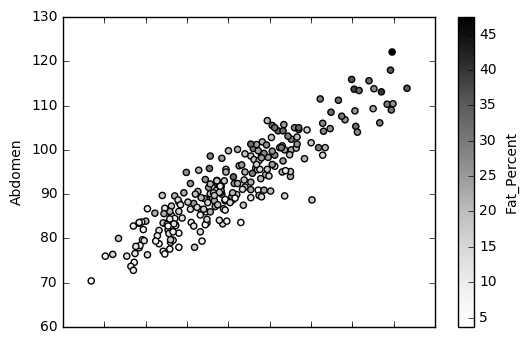

In [37]:
bodyFat.plot(kind='scatter',x='Chest',y='Abdomen', c='Fat_Percent')

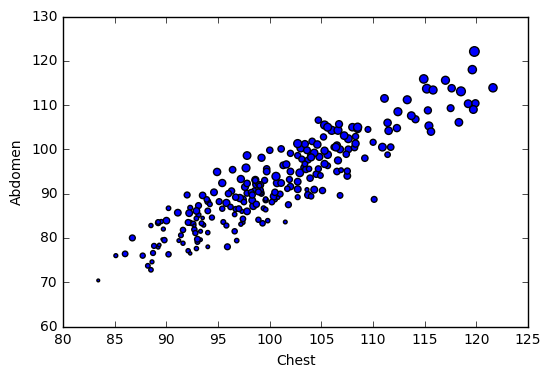

In [38]:
bodyFat.plot(kind='scatter',x='Chest',y='Abdomen', s = bodyFat['Fat_Percent'])

# Seleccion de datos

## Directo y Slides

Se usa **iat** para acceder a un valor único, **iloc** para acceder a filas o columnas (usando índice) y **loc** para acceder a columnas (pero usando el nombre en lugar del índice)


In [39]:
paises.iat[3, 0]

41526

In [40]:
paises.iloc[4:1:-1]

,Area,Capital,Pais,Poblacion,Densidad
4,244820,Londres,Reino Unido,64.9,265.092721
3,41526,Amsterdam,Holanda,16.9,406.973944
2,357050,Berlin,Alemania,81.3,227.699202


In [100]:
paises.iloc[:,0:3]

,Area,Capital,Pais
0,30510,Bruselas,Belgica
1,671308,Paris,Francia
2,357050,Berlin,Alemania
3,41526,Amsterdam,Holanda
4,244820,Londres,Reino Unido


In [42]:
paises.loc[:,'Capital':'Pais']

,Capital,Pais
0,Bruselas,Belgica
1,Paris,Francia
2,Berlin,Alemania
3,Amsterdam,Holanda
4,Londres,Reino Unido


Tambien se puede usar Fancy Indexing en las columnas

In [43]:
paises[['Capital','Pais']]

,Capital,Pais
0,Bruselas,Belgica
1,Paris,Francia
2,Berlin,Alemania
3,Amsterdam,Holanda
4,Londres,Reino Unido


Si queremos todas las columnas menos un subcojunto podemos borrar en lugar de seleccionar.
Con **drop** podemos borrar tanto columnas (axis=1) como filas (axis=0 default)

In [44]:
paises.drop(['Capital','Pais'], axis=1)

,Area,Poblacion,Densidad
0,30510,11.3,370.370370
1,671308,64.3,95.783158
2,357050,81.3,227.699202
3,41526,16.9,406.973944
4,244820,64.9,265.092721


## Selección de Filas

- Máscara Booleana
- Isin
- Query
- Duplicados
- Mayores y menores
- Remuestreos

### Máscara booleana

Se puede hacer de la misma manera que con Series y arrays de NumPy

In [45]:
paises[paises['Densidad'] > 300]

,Area,Capital,Pais,Poblacion,Densidad
0,30510,Bruselas,Belgica,11.3,370.370370
3,41526,Amsterdam,Holanda,16.9,406.973944


### isin 

Permite seleccionar filas cuyos valores se encuentren en una determinada colección.


In [102]:
paises[paises['Capital'].isin(['Bruselas','Madrid'])]


,Area,Capital,Pais,Poblacion,Densidad
0,30510,Bruselas,Belgica,11.3,370.37037


### Query 

Permite seleccionar valores usando una expresión (la expresión tiene que ser una cadena)

In [47]:
jugadores.query('Asistencias < 20')

,Asistencias,Puntos,Rebotes,Robos
Nombre,,,,
Lebron James,8,38,22,2
Kobe Bryant,10,37,16,2


In [103]:
jugadores.query('Asistencias + Rebotes < Puntos')

,Asistencias,Puntos,Rebotes,Robos
Nombre,,,,
Lebron James,8,38,22,2
Kobe Bryant,10,37,16,2


### Duplicados

Se pueden obtener los duplicados con **duplicated** y eliminar los duplicados con **drop_duplicates**

In [49]:
jugadores[jugadores.duplicated()]

,Asistencias,Puntos,Rebotes,Robos
Nombre,,,,


In [50]:
jugadores.drop_duplicates()

,Asistencias,Puntos,Rebotes,Robos
Nombre,,,,
Pau Gasol,20,24,20,1
Lebron James,8,38,22,2
Michael Jordan,20,36,16,4
Kobe Bryant,10,37,16,2


### Mayores y menores

Se pueden obtener las filas correspondientes a los N mayores o menores de acuerdo a una determinada columna.


In [51]:
# los 2 menores puntuadores
jugadores.nsmallest(2,'Puntos')

# los 2 mayores puntuadores
jugadores.nlargest(2,'Puntos')


,Asistencias,Puntos,Rebotes,Robos
Nombre,,,,
Lebron James,8,38,22,2
Kobe Bryant,10,37,16,2


### Remuestreos

Hay una función para obtener un conjunto de filas aleatorio **sample()**. Con las siguientes opciones:
- replace Remuestreo con o sin remplazamiento
- weights Puede usar como pesos el valor de una columna
- n número de elementos a seleccionar

**sample()** también hace remuestreos de columnas poniendo como opción adicional (axis = 1)

In [52]:
paises.sample(n=3)

,Area,Capital,Pais,Poblacion,Densidad
2,357050,Berlin,Alemania,81.3,227.699202
1,671308,Paris,Francia,64.3,95.783158
3,41526,Amsterdam,Holanda,16.9,406.973944


In [53]:
'''
Remuestreo con reemplazamiento.
Hay N bolas en una bolsa y voy a elegir 10, 
cada vez que saco una la vuelvo a meter.
Hay bolas que tienen más probabilidad que otras.
''' 

paises.sample(n=10,weights='Poblacion', replace=True)

,Area,Capital,Pais,Poblacion,Densidad
4,244820,Londres,Reino Unido,64.9,265.092721
2,357050,Berlin,Alemania,81.3,227.699202
0,30510,Bruselas,Belgica,11.3,370.370370
4,244820,Londres,Reino Unido,64.9,265.092721
1,671308,Paris,Francia,64.3,95.783158
4,244820,Londres,Reino Unido,64.9,265.092721
1,671308,Paris,Francia,64.3,95.783158
1,671308,Paris,Francia,64.3,95.783158
1,671308,Paris,Francia,64.3,95.783158
1,671308,Paris,Francia,64.3,95.783158


## Selección de columnas

A parte de la selección directa, por slides o fancy se pueden seleccionar columnas que cumpla algunos criteros.

https://docs.python.org/3/library/re.html

In [108]:
# Ejemplo, columnas que acaban en s
# Nota, ninguna acaba en 's', pero si quito $ me sale las que tienen 's'
paises.filter(regex='s$')

,Pais
0,Belgica
1,Francia
2,Alemania
3,Holanda
4,Reino Unido


Si tenemos un indice que es de tipo cadena también podemos usar el filter con las filas. Usando axis = 0 para trabajar a nivel de filas en lugar de a nivel de columnas.

In [55]:
jugadores.filter(regex=' J',axis=0)

,Asistencias,Puntos,Rebotes,Robos
Nombre,,,,
Lebron James,8,38,22,2
Michael Jordan,20,36,16,4


## Creación de nuevos datos

Ya habiamos visto la creación de una columna

```Python
paises['Densidad'] = paises['Poblacion']*1000000/paises['Area']
```

Otra forma es con **assign**


In [56]:
def calificaJugadores(df):
    robador = df.Robos >= 3
    
    return robador

jugadores.assign(robador = calificaJugadores)

,Asistencias,Puntos,Rebotes,Robos,robador
Nombre,,,,,
Pau Gasol,20,24,20,1,False
Lebron James,8,38,22,2,False
Michael Jordan,20,36,16,4,True
Kobe Bryant,10,37,16,2,False


In [57]:
jugadores

,Asistencias,Puntos,Rebotes,Robos
Nombre,,,,
Pau Gasol,20,24,20,1
Lebron James,8,38,22,2
Michael Jordan,20,36,16,4
Kobe Bryant,10,37,16,2


## Aplicación de funciones

- Apply: De una serie (fila o columna) obtiene un valor
- Map y Applymap: Aplica una operación a todos los elementos de una Serie o de un DataFrame 

In [58]:
# Aplico la función suma a todos los elementos de la columna o de la fila
print(jugadores.apply(sum))
print(jugadores.apply(sum,axis=1))

Asistencias     58
Puntos         135
Rebotes         74
Robos            9
dtype: int64
Nombre
Pau Gasol         65
Lebron James      70
Michael Jordan    76
Kobe Bryant       65
dtype: int64


In [59]:
# los jugadores con menos de 10 asistencias les cuento como que no tienen ninguna
jugadores['Asistencias'].map(lambda x: 0 if x < 10 else x)

Nombre
Pau Gasol         20
Lebron James       0
Michael Jordan    20
Kobe Bryant       10
Name: Asistencias, dtype: int64

In [60]:
# Les quito 1 a todos
jugadores.applymap(lambda x: x-1)

,Asistencias,Puntos,Rebotes,Robos
Nombre,,,,
Pau Gasol,19,23,19,0
Lebron James,7,37,21,1
Michael Jordan,19,35,15,3
Kobe Bryant,9,36,15,1


## Cambiar la forma de los datos 

En Pandas se cambia la forma de los DataFrames para hacerlos más apropiados a un determinado análisis.

- Transponer
- Pivot
- Pivot Table
- Stack, Unstack


### Transponer

La operación más sencilla es la transposición: cambiar las filas por las columnas

In [61]:
jugadores.transpose()

Nombre,Pau Gasol,Lebron James,Michael Jordan,Kobe Bryant
Asistencias,20,8,20,10
Puntos,24,38,36,37
Rebotes,20,22,16,16
Robos,1,2,4,2


### Pivot 

Pivot toma 3 argumentos: index, columns, values. Cada uno de estos argumentos son nombres de columnas en el DataFrame original.
La función pivot creará una nueva tabla donde habrá:
- Tantas filas como valores únicos de la columna especificada en 'index'.
- Tantas columnas como valores únicos en la columna especificada en 'columns'.
- Los valores de las celdas pertenecen a la columna dada como 'values'

In [62]:

df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 
                   'B':['a', 'b', 'a', 'b'], 
                   'C':range(4)})
df



,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [63]:
df.pivot(index = 'A', columns = 'B', values = 'C')

B,a,b
A,,
one,0,1
two,2,3


Queda de la siguiente manera:
- Tenemos 2 filas porque A tenía 2 valores diferentes
- Tenemos 2 columnas porque B tenía 2 valores diferentes

Pivot tiene una limitación, si tenemos inicialmente varias filas con las columnas A-B duplicadas falla

In [64]:
df2 = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 
                   'B':['a', 'a', 'a', 'b'], 
                   'C':range(4)})
df2
# Si hacemos pivot ahora falla por one - a está repetido 
#df2.pivot(index = 'A', columns = 'B', values = 'C')

,A,B,C
0,one,a,0
1,one,a,1
2,two,a,2
3,two,b,3


### Pivot Table

La función **pivot_table** permite no solo especificar índice, columnas y valores. Permite especificar una función de agregación en el caso en el que haya multiples valores para un mismo valor de índice y columna.
Estas funciones de agregación son: cualquiera de numpy para trabajar con todo un array de elementos a la vez: mean, median, sum, count, max, min etc


In [65]:
'''
Una tabla donde los valores del índice formado por A y B se repiten
'''
df3 = pd.DataFrame({'A':['one', 'one', 'two', 'two', 'one', 'two'], 
                   'B':['a', 'b', 'a', 'b', 'a', 'b'], 
                   'C':range(6)})
df3

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3
4,one,a,4
5,two,b,5


In [66]:
df3.pivot_table(index='A', columns='B', values='C', aggfunc='count') 

B,a,b
A,,
one,2,1
two,1,2


### Stack / Unstack

Pivotar significa colocar los valores de un índice como valores de las columnas o colocar los valores de las columnas como valores de un índice.

- Unstack Pivota sobre los valores del índice. Si hay varios índices pivota sobre el índice más interno. Los valores del índice pasan a ser valores de las columnas.

- Stack Pivota sobre los valores de las columnas. Es la operación contraria a Unstack. Los valores de las columnas pasan a ser un índice.

In [67]:
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


En este dataframe hay dos índices, el más interno es B
unstack pondrá los valores de B como columnas.

In [68]:
df_multindex=df.set_index(['A', 'B'])
df_multindex

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [69]:
unstacked = df_multindex.unstack()
unstacked

C   
B    a  b
A        
one  0  1
two  2  3

Los valores de las columnas son a y b. Stack pone estos valores como índice.

In [70]:
stacked=unstacked.stack()
stacked

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [71]:
stacked.reset_index()

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


## Agrupaciones (Group By)

El *group by* es un proceso formado por 3 pasos:
- Splitting (División): Separar los datos de acuerdo a un criterio.
- Applying (Aplicación): Aplicar una funcion a los datos de cada grupo de manera independiente.
- Combining (Combiación): Combinar los resultados en una única estructura de datos.

In [72]:
paraAgrupar = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                       'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
paraAgrupar

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
4,10,B
5,15,C
6,10,A
7,15,B
8,20,C


In [73]:
agrupado = paraAgrupar.groupby('key').aggregate(sum)
agrupado.reset_index()

,key,data
0,A,15
1,B,30
2,C,45


## Merge, Join, Concat

Pandas proporciona varias funciones para combinar Series y DataFrames.

### Concat

Realiza la operación de concatenación, a la vez que tiene en cuenta las operaciones lógicas de unión e intersección de los índices.

Por defecto hace unión de los índices.


In [74]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])
    

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7])
     

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])
   

Concatena los dataframes en vertical

In [75]:
pd.concat([df1, df2, df3])


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [76]:
df4 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])
    

df5 = pd.DataFrame({'a': ['A4', 'A5', 'A6', 'A7'],
                        'b': ['B4', 'B5', 'B6', 'B7'],
                        'c': ['C4', 'C5', 'C6', 'C7'],
                        'd': ['D4', 'D5', 'D6', 'D7']},
                         index=[0, 1, 2, 3])

Ahora tenemos dos dataframes que comparten los índices. Se van a concatenar a nivel de columnas (axis = 1).

El dataFrame resultante tiene la unión de los índices. Es decir sigue teniendo 4 filas pero tiene 8 columnas.

In [77]:
pd.concat([df4, df5], axis=1)


,A,B,C,D,a,b,c,d
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


In [78]:
df6 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])
    

df7 = pd.DataFrame({'a': ['A4', 'A5', 'A6', 'A7'],
                        'b': ['B4', 'B5', 'B6', 'B7'],
                        'c': ['C4', 'C5', 'C6', 'C7'],
                        'd': ['D4', 'D5', 'D6', 'D7']},
                         index=[3, 4, 5, 6])

In [79]:
pd.concat([df6, df7], axis=1)


,A,B,C,D,a,b,c,d
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,A4,B4,C4,D4
4,NaN,NaN,NaN,NaN,A5,B5,C5,D5
5,NaN,NaN,NaN,NaN,A6,B6,C6,D6
6,NaN,NaN,NaN,NaN,A7,B7,C7,D7


Por defecto se realiza la unión de los índices, pero esto se puede configurar con el parámetro *join*, poniendo este valor como *inner* se realiza la intersección de los índices.

El único valor de índice que coindice en los 2 dataframes es el 3, luego tenemos como resultado un dataframe con una sola fíla.

In [80]:
pd.concat([df6, df7], axis=1, join = 'inner')


,A,B,C,D,a,b,c,d
3,A3,B3,C3,D3,A4,B4,C4,D4


### Append

Append es un shorcut de concat

In [81]:
df1.append(df2)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


### Merge/Join

Pandas tiene operaciones de alto rendimiento ejecutadas en memoria que son similares a las que se pueden realizar con SQL.

Merge espera que se especifique una columna y join combina los dataframes usando los índices.

Los parámetos del merge son:
- how 
    - left 	usa todas las claves del dataframe de la izquierda
    - right usa todas las claves del dataframe de la derecha
    - outer usa todas las claves de ambos frames
    - inner usa la intersección de claves
- on: Nombre de la columna o columnas usadas para hacer la unión
- left_on, right_on: El nombre de la columna en la tabla derecha e izquierda (en el caso en el que sean diferentes)



In [82]:
raw_data = {
        'id': ['1', '2', '3', '4', '5'],
        'nombre': ['Jose', 'Pedro', 'Ramon', 'Maria', 'Marta'],
        'apellido': ['Perez', 'Sanchez', 'Garcia', 'Arnaiz', 'Rodriguez']}
dfMineria = pd.DataFrame(raw_data, columns = ['id', 'nombre', 'apellido'])
dfMineria

,id,nombre,apellido
0,1,Jose,Perez
1,2,Pedro,Sanchez
2,3,Ramon,Garcia
3,4,Maria,Arnaiz
4,5,Marta,Rodriguez


In [83]:
raw_data = {
        'idClase': ['4', '5', '6', '7', '8'],
        'nota': [9,6,5,7,4]}
dfNotas = pd.DataFrame(raw_data, columns = ['idClase', 'nota'])
dfNotas

,idClase,nota
0,4,9
1,5,6
2,6,5
3,7,7
4,8,4


In [84]:
pd.merge(dfMineria, dfNotas, how='outer', left_on='id', right_on='idClase')

,id,nombre,apellido,idClase,nota
0,1,Jose,Perez,NaN,NaN
1,2,Pedro,Sanchez,NaN,NaN
2,3,Ramon,Garcia,NaN,NaN
3,4,Maria,Arnaiz,4,9.0
4,5,Marta,Rodriguez,5,6.0
5,NaN,NaN,NaN,6,5.0
6,NaN,NaN,NaN,7,7.0
7,NaN,NaN,NaN,8,4.0


In [85]:
pd.merge(dfMineria, dfNotas, how='inner', left_on='id', right_on='idClase')

,id,nombre,apellido,idClase,nota
0,4,Maria,Arnaiz,4,9
1,5,Marta,Rodriguez,5,6


In [86]:
raw_data = {
        'nombre': ['Jose', 'Rosa', 'Julian', 'Maria', 'Marta'],
        'apellido': ['Perez', 'Esteban', 'Garcia', 'Pastor', 'Rodriguez'],
        'puesto': ['Ganador', 'Finalista', 'Finalista', '1º Ronda', '1º Ronda']
}
dfTrivial = pd.DataFrame(raw_data, columns = ['nombre', 'apellido', 'puesto'])
dfTrivial

,nombre,apellido,puesto
0,Jose,Perez,Ganador
1,Rosa,Esteban,Finalista
2,Julian,Garcia,Finalista
3,Maria,Pastor,1º Ronda
4,Marta,Rodriguez,1º Ronda


In [87]:
pd.merge(dfMineria, dfTrivial, on=['nombre', 'apellido'])

,id,nombre,apellido,puesto
0,1,Jose,Perez,Ganador
1,5,Marta,Rodriguez,1º Ronda


# Referencias

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
https://github.com/jakevdp/PythonDataScienceHandbook
https://github.com/jorisvandenbossche/2015-PyDataParis
http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/